scrape tweets for S&P40 with snscrape

In [1]:
#import paclages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import snscrape.modules.twitter as sntwitter
import re
import tqdm

#scrape data in for loop between 21/09/21 and 31/01/23 for constituents of S&P 40 index
sp40_comps=["$AAPL","$MSFT","$AMZN","$GOOG","$BRK.B","$NVDA","$XOM","$UNH","$TSLA","$JNJ","$JPM","$V","$PG","$META","$HD","$MA","$CVX","$MRK","$LLY","$ABBV","$BACRP","$PFE","$KO","$PEP","$AVGO","$COST","$TMO","$WMT","$DIS","$CSCO","$MCD","$ABT","$WFC","$VZ","$ACN","$DHR","$ADBE","$CMCSA","$CRM"]
#create day list with dates between 21/09/21 and 31/01/23
day_list = pd.date_range(start='2021-09-21', end='2023-01-31').tolist()

tweets_df = pd.DataFrame()
for company in tqdm.tqdm(sp40_comps):
    tweets_list = []
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(company + '(feel OR I OR I am OR stock) lang:en since:2021-09-20 until:2023-01-31').get_items()):
        if i>100000:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.replyCount, tweet.retweetCount, tweet.quoteCount])
    tweets_df = tweets_df.append(tweets_list, ignore_index = True)
tweets_df.columns = ['Datetime', 'Tweet Id', 'Text', 'Username', 'Likes', 'Replies', 'Retweets', 'Quotes']
tweets_df = tweets_df.sort_values(by='Datetime', ascending=False)

#save data
tweets_df.to_csv('S&P40.csv', index=False)




  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\Maximilian Horstmann\AppData\Local\Temp\ipykernel_4496\2423929162.py:23: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.replyCount, tweet.retweetCount, tweet.quoteCount])
C:\Users\Maximilian Horstmann\AppData\Local\Temp\ipykernel_4496\2423929162.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(tweets_list, ignore_index = True)
100%|██████████| 2/2 [14:22<00:00, 431.23s/it]


Check Tweets per day

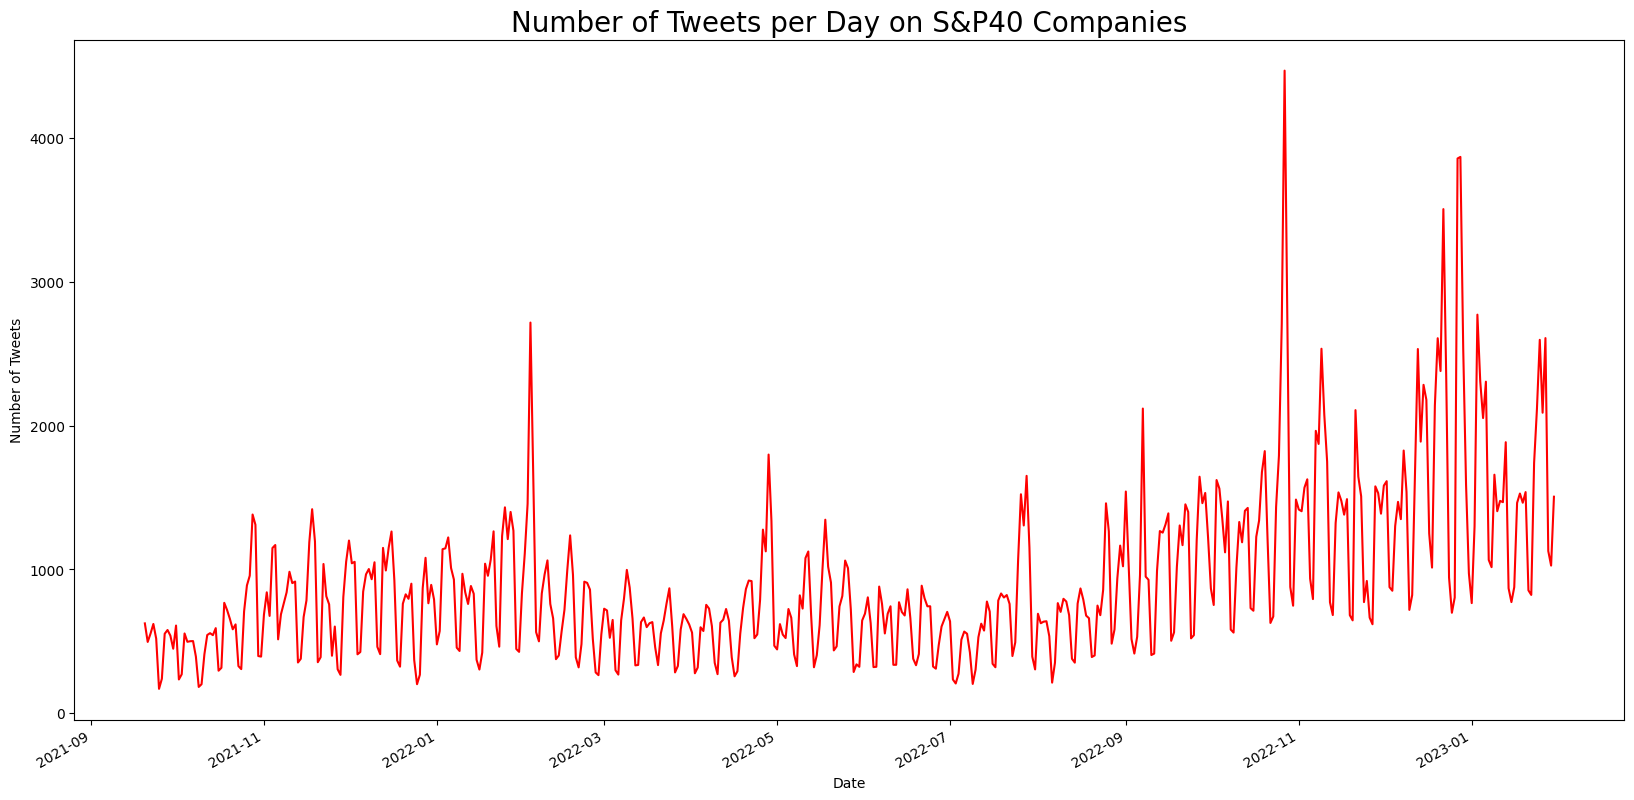

In [9]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#read in data
df=pd.read_csv('S&P40_sentiment.csv',sep=';')

#plot number of tweets per day
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = df['Datetime'].dt.date
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'])

df['Date'].value_counts().plot(kind='line', figsize=(20,10), color='red')
plt.title('Number of Tweets per Day on S&P40 Companies', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()


Scrape data for new S&P40

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np

sp40_comps=["AAPL","MSFT","AMZN","GOOG","BRK-B","GOOG","NVDA","XOM","UNH","TSLA","JNJ","JPM","V","PG","META","HD","MA","CVX","MRK","LLY","ABBV","BACRP","PFE","KO","PEP","AVGO","COST","TMO","WMT","DIS","CSCO","MCD","ABT","WFC","VZ","ACN","DHR","ADBE","CMCSA","CRM"]

# scrape data for constituents of S&P 40 index from 21/09/21 to 31/01/23 from the sp40_comps list with for loop and take only daily close price
sp40_price=pd.DataFrame()
for company in sp40_comps:
    print(company)
    data = yf.download(company, start="2021-09-21", end="2023-01-31")
    data = data[['Close']]
    #create dataframe with daily close price
    data = pd.DataFrame(data)
    #rename column to company name for merging
    data[[str(company)]]=data[['Close']]

    #merge dataframes
    sp40_price = pd.concat([sp40_price, data[[str(company)]]], axis=1)  

print(sp40_price)

#now create new column called SP40 with the weighted average of constitutents first define the weighted average function
def weighted_average(df, weights):
    return (df * weights).sum(axis=1)

#now create the weights for the weighted average
weights = [0.134944397, 0.115483319, 0.057313944, 0.036997434, 0.035072712, 0.03314799, 0.030367836, 0.02994012, 0.029084688, 0.029084688, 0.02673225, 0.02566296, 0.02352438, 0.021171942, 0.020958084, 0.020744226, 0.019674936, 0.01924722, 0.01710864, 0.016894782, 0.016253208, 0.015397776, 0.015397776, 0.01497006, 0.014756202, 0.014756202, 0.014114628, 0.01390077, 0.012617622, 0.012403764, 0.012403764, 0.012189906, 0.011976048, 0.011120616, 0.010906758, 0.010906758, 0.010906758, 0.0106929, 0.0106929, 0.010479042]
#now create the new column SP40 with the weighted average of constitutents
sp40_price['SP40'] = weighted_average(sp40_price, weights)
print(sp40_price)
sp40_price.to_csv('S&P40_price.csv', sep=";")


AAPL
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
AMZN
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed
BRK-B
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
XOM
[*********************100%***********************]  1 of 1 completed
UNH
[*********************100%***********************]  1 of 1 completed
TSLA
[*********************100%***********************]  1 of 1 completed
JNJ
[*********************100%***********************]  1 of 1 completed
JPM
[*********************100%***********************]  1 of 1 completed
V
[*********************100%***********************]  1 of 1 completed
PG
[*********************100%***************

Sentiment analysis

In [ ]:
#Start of the Sentiment Analysis
import torch
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
import tqdm as tqdm
from scipy.special import softmax
import pandas as pd

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    if len(new_text) < 3:
        return None
    return " ".join(new_text)

# Load the model from /home/azureuser/cloudfiles/code/cardiffnlp/twitter-xlm-roberta-base-sentiment
MODEL = f'cardiffnlp/twitter-xlm-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

# Start of the Sentiment Analysis with the tweets from the csv file
# Load data
df = pd.read_csv('S&P40.csv', sep=',')
df = df.dropna()
df['Text'] = df['Text'].apply(preprocess)

# Tokenize and encode sequences in the training set
text = df['Text'].tolist()
encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')

# Compute sentiment polarity scores in batches of 32
batch_size = 32
scores = [] 
for i in tqdm.tqdm(range(0, len(encoded_input['input_ids']), batch_size)):
    result = model(**{k: v[i:i+batch_size].to(model.device) for k, v in encoded_input.items()})
    scores.extend(result.logits.detach().cpu().numpy())

# Compute softmax probabilities
probs = softmax(np.array(scores), axis=1)

# Add predicted probabilities to the dataframe
df['Negative'] = probs[:, 0]
df['Neutral'] = probs[:, 1]
df['Positive'] = probs[:, 2]

#save data
df.to_csv('S&P40_sentiment.csv', index=False)

categorize the tweets and filter for those with business related keywords

In [19]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweetnlp as tnlp
from tqdm import tqdm

#load data
df = pd.read_csv('S&P40_sentiment.csv', sep=';')
df = df.dropna()

#only take those tweets that are more than 3 words
df['Text'] = df['Text'].apply(lambda x: ' '.join(x.split(' ')[:3]) if len(x.split(' ')) > 3 else x)

#categorize the tweets into the categories from tweetnlp ina for loop batches of 32 abd concatenate the results
model = tnlp.load_model('topic_classification')
batch_size = 32
categories = []
for i in tqdm(range(0, len(df['Text']), batch_size)):
    batch = df['Text'][i:i+batch_size].tolist()
    batch_categories = model.predict(batch)
    categories.extend(batch_categories)
    
#add the categories to the dataframe
df['Category'] = categories

#save data
df.to_csv('S&P40_tagged.csv', sep=";",index=False)

#select all with the category 'business_&_entrepreneurs' or 'news_&_social_concern'
df = df[(df['Category'] == 'business_&_entrepreneurs') | (df['Category'] == 'news_&_social_concern')]

100%|██████████| 14244/14244 [5:43:21<00:00,  1.45s/it]      


In [2]:
#merge the dataframes
#load data
import pandas as pd
tweets = pd.read_csv('S&P40_sentiment.csv', sep=';')
tweets['Datetime'] = pd.to_datetime(tweets['Datetime'])

tweets['Date'] = tweets['Datetime'].dt.date
tweets_per_day = tweets.groupby('Date').count()
tweets_per_day = tweets_per_day.reset_index()
tweets_per_day = tweets_per_day[['Date', 'Text']]
tweets_per_day.columns = ['Date', 'Tweets']
tweets_per_day = tweets_per_day.sort_values(by='Date', ascending=True)
print(tweets_per_day.head())

#calculate mean submissions per day
print(tweets_per_day['Tweets'].mean())
#calculate stddv submissions per day
print(tweets_per_day['Tweets'].std())
print(tweets_per_day['Tweets'].min())

#calculate 25th percentile submissions per day
print(tweets_per_day['Tweets'].quantile(0.25))

#show days with most submissions
print(tweets_per_day.sort_values(by='Tweets', ascending=False).head(10))

#print tweet with highest number of positive
print(tweets[tweets['Positive'] == tweets['Positive'].max()])





         Date  Tweets
0  2021-09-20     625
1  2021-09-21     496
2  2021-09-22     554
3  2021-09-23     621
4  2021-09-24     519
915.2449799196787
579.1993851789291
170
543.0
           Date  Tweets
402  2022-10-27    4469
464  2022-12-28    3869
463  2022-12-27    3858
458  2022-12-22    3506
470  2023-01-03    2772
136  2022-02-03    2717
401  2022-10-26    2710
403  2022-10-28    2681
494  2023-01-27    2609
456  2022-12-20    2608
                        Datetime             Tweet Id  \
435042 2021-10-29 08:09:51+00:00  1453997496439488517   

                                                     Text  Username  Likes  \
435042  @user @user @user @user Congrats to @user I am...  DxAronno    0.0   

        Replies  Retweets  Quotes  Negative   Neutral  Positive        Date  
435042      0.0       0.0     0.0  0.009575  0.034633  0.955793  2021-10-29  


                    Datetime             Tweet Id  \
0  2023-01-30 23:59:09+00:00  1620210035191341056   
1  2023-01-30 23:56:21+00:00  1620209331835912194   
2  2023-01-30 23:55:39+00:00  1620209155796783104   
3  2023-01-30 23:55:19+00:00  1620209071776468993   
4  2023-01-30 23:50:18+00:00  1620207811312652291   

                                                Text         Username  Likes  \
0  @user I bought 111 $TSLA for around$ 120 with ...     fairdinkum82    2.0   
1  Every Morning several hours before the open\nI...        AjTrader7    2.0   
2  $TSLA I kinda of amazed how accurate support l...         MrTeslaX   14.0   
3  “The Empire Strikes Back” not a good analogy.\...    BWHildebrandt    1.0   
4  @user Yeah I am guilty hyping chess... It has ...  CrazyLadyTrader    2.0   

   Replies  Retweets  Quotes  Negative   Neutral  Positive  \
0      1.0       0.0     0.0  0.032998  0.322545  0.644457   
1      1.0       1.0     0.0  0.073761  0.714798  0.211440   
2      3.0    

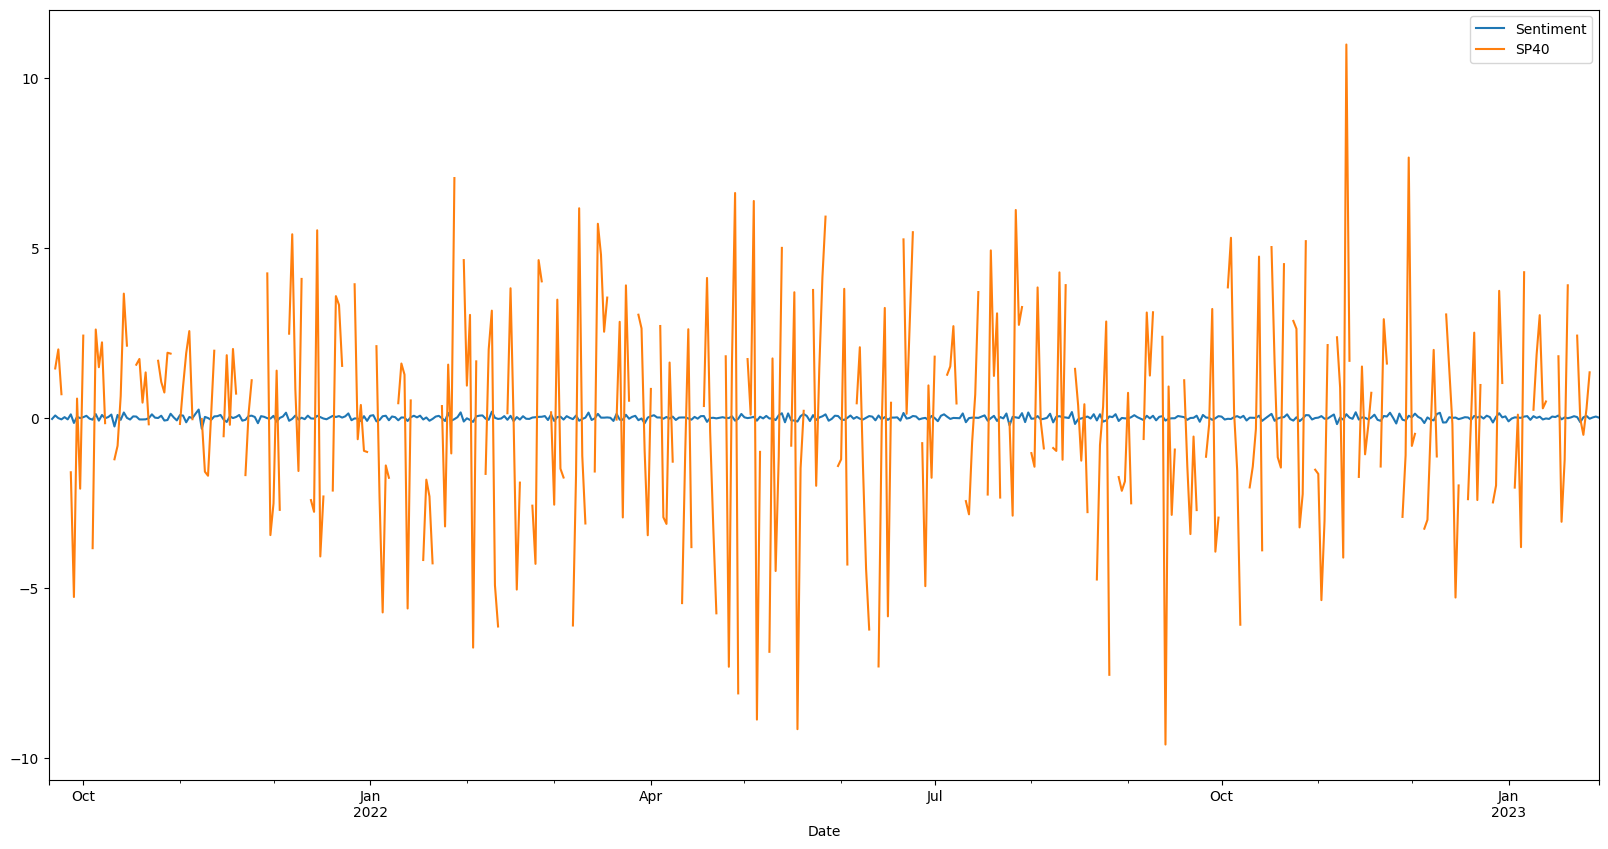

In [3]:
# Scrape the Index data for DAX40 from Yahoo Finance
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Import the tweets dax_40_sentiment.csv
tweets = pd.read_csv('S&P40_tagged.csv', sep=';')
print(tweets.head(5))
sp40=pd.read_csv("S&P40_price.csv", sep=';')
# Set the index to the Date column
tweets['Date'] = pd.to_datetime(tweets['Datetime'])
tweets["Date"]=tweets["Date"].dt.date
tweets = tweets.set_index('Date')
sp40['Date'] = pd.to_datetime(sp40['Date'])
sp40 = sp40.set_index('Date')
sp40 = sp40[['SP40']]

#calculate the sentiment score
tweets['Sentiment'] = (tweets['Positive'] - tweets['Negative'])/(tweets['Positive'] + tweets['Negative'])

#change df to daily mean of sentiment, positive, neutral and negative 
tweets_d = tweets[['Negative', "Neutral","Positive","Sentiment"]].groupby('Date').mean()

# Change to pct change to all columns
tweets_d['Sentiment'] = tweets_d['Sentiment'].diff()
tweets_d['Positive'] = tweets_d['Positive'].diff()
tweets_d['Negative'] = tweets_d['Negative'].diff()
tweets_d['Neutral'] = tweets_d['Neutral'].diff()
sp40['SP40'] = sp40['SP40'].diff()

# Merge the two dataframes
sp40merge = pd.merge(tweets_d, sp40, left_index=True, right_index=True, how='outer')
print(sp40merge.head(5))

# Plot the sentiment score per day and the DAX index
sp40merge.plot(y=['Sentiment', 'SP40'], kind='line', figsize=(20, 10))
plt.show()

# Save the merged data in a csv file
sp40merge.to_csv("S&P40_merged.csv",sep=";")


First use zscore to normalize the data

Then use the normalized data to calculate the sentiment score  for each day

         Date  Negative   Neutral  Positive  Sentiment      SP40
0  2021-09-20       NaN       NaN       NaN        NaN       NaN
1  2021-09-21  0.035848 -0.041223  0.005375  -0.034605       NaN
2  2021-09-22 -0.035410  0.010438  0.024972   0.067428  1.449001
3  2021-09-23  0.000065  0.011311 -0.011375  -0.010393  2.009437
4  2021-09-24  0.026652 -0.036141  0.009490  -0.047108  0.692108
            Negative   Neutral  Positive  Sentiment      SP40
Date                                                         
2021-09-22 -0.035410  0.010438  0.024972   0.067428  1.449001
2021-09-23  0.000065  0.011311 -0.011375  -0.010393  2.009437
2021-09-24  0.026652 -0.036141  0.009490  -0.047108  0.692108
2021-09-27 -0.028826  0.002321  0.026505   0.100129 -1.602734
2021-09-28  0.055465 -0.018889 -0.036576  -0.152314 -5.268817


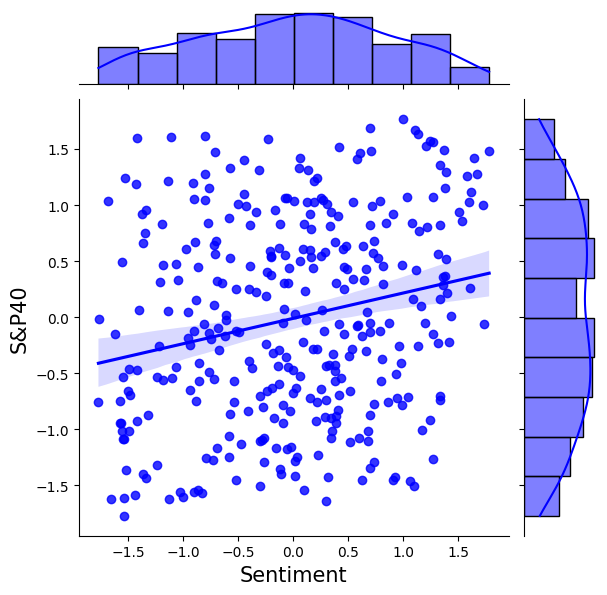

<Figure size 1000x1000 with 0 Axes>

In [1]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns


# Load the data
data = pd.read_csv('S&P40_merged.csv', sep=';',na_values=True)
print(data.head(5))

# Set the index to the Date column
data = data.set_index('Date')

#drop nan values in S&P40
data = data.dropna(subset=['SP40'])
#replace nan with rolling median of 5 days
data['Sentiment'] = data['Sentiment'].fillna(data['Sentiment'].rolling(5, min_periods=1).mean())
data['Positive'] = data['Positive'].fillna(data['Positive'].rolling(5, min_periods=1).mean())
data['Neutral'] = data['Neutral'].fillna(data['Neutral'].rolling(5, min_periods=1).mean())
data['Negative'] = data['Negative'].fillna(data['Negative'].rolling(5, min_periods=1).mean())

print(data.head(5))
# Create zscore with rolling mean and standard deviation on sentiment, positive, neutral, negative
data['Sentiment_zscore'] = (data['Sentiment'] - data['Sentiment'].rolling(5).mean()) / data['Sentiment'].rolling(5).std()
data['Positive_zscore'] = (data['Positive'] - data['Positive'].rolling(5).mean()) / data['Positive'].rolling(5).std()
data['Neutral_zscore'] = (data['Neutral'] - data['Neutral'].rolling(5).mean()) / data['Neutral'].rolling(5).std()
data['Negative_zscore'] = (data['Negative'] - data['Negative'].rolling(5).mean()) / data['Negative'].rolling(5).std()
data['SP40_zscore']= (data['SP40'] - data['SP40'].rolling(5).mean()) / data['SP40'].rolling(5).std()


# Create zscore with rolling mean and standard deviation on S&P40
#plot correlation between z-score of sentiment and z-score of close price
sns.jointplot(x='Sentiment_zscore', y='SP40_zscore', data=data, kind='reg', color='blue')
#add title and labels
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('S&P40', fontsize=15)
plt.figure(figsize=(10,10))
plt.show()

#save data
data.to_csv('S&P40_zscore.csv', sep=';')


Conduct AD fuller test to check the stationarity of the data

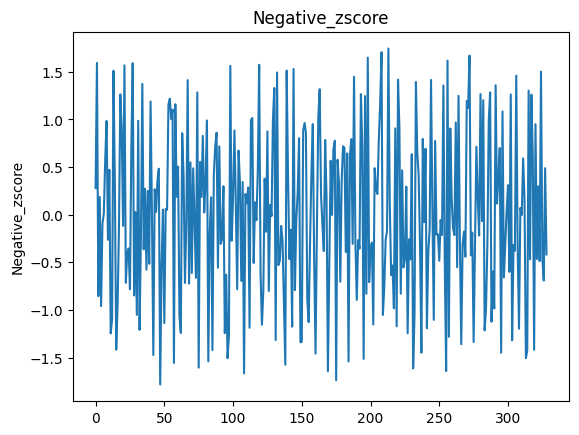

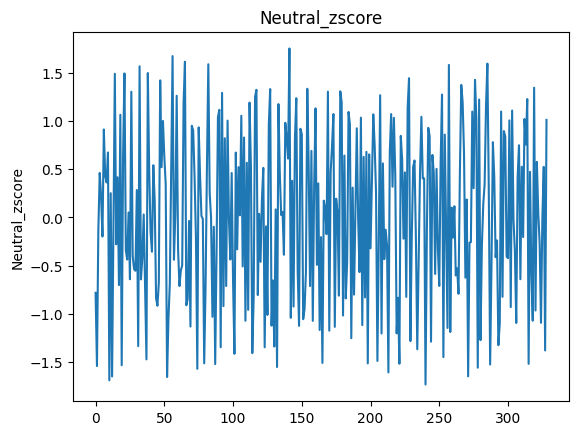

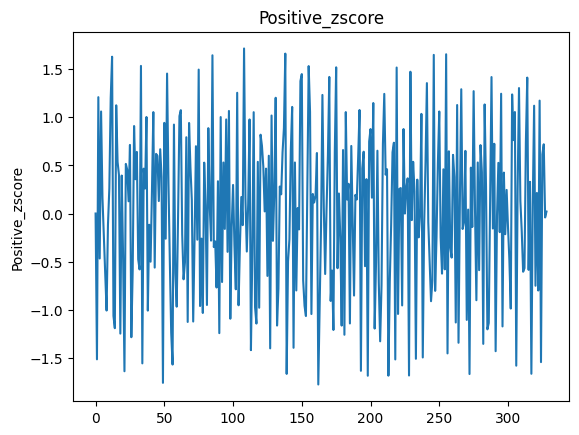

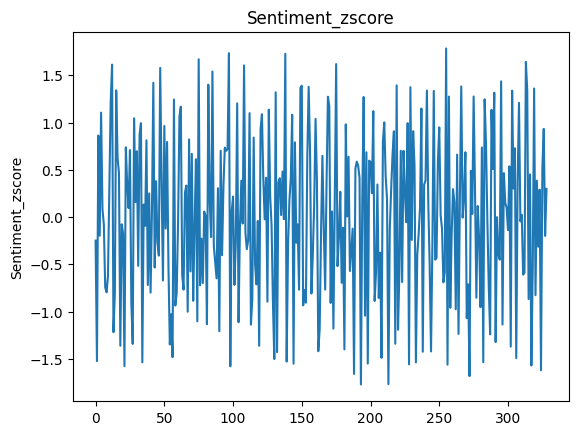

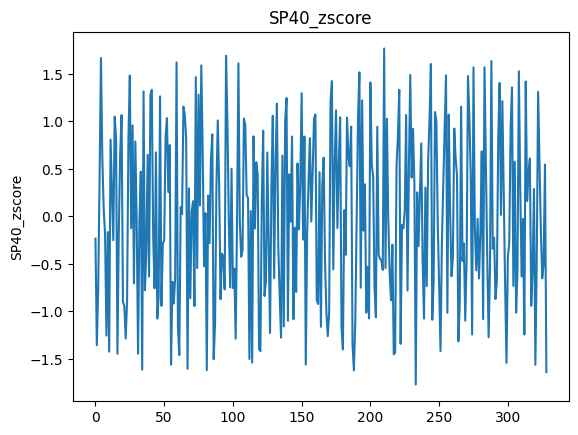


Column: Negative_zscore
ADF Statistic: -9.831248791697643
p-value: 5.030437409732721e-17
Critical Values:
	1%: -3.450886958636161
	5%: -2.870586350823483
	10%: -2.5715897843576827

Column: Neutral_zscore
ADF Statistic: -12.561814518911133
p-value: 2.0945252628806167e-23
Critical Values:
	1%: -3.450695263332383
	5%: -2.87050218926466
	10%: -2.5715449066453284

Column: Positive_zscore
ADF Statistic: -9.921791539823792
p-value: 2.977552905411693e-17
Critical Values:
	1%: -3.450886958636161
	5%: -2.870586350823483
	10%: -2.5715897843576827

Column: Sentiment_zscore
ADF Statistic: -9.704081154659317
p-value: 1.0532368372663318e-16
Critical Values:
	1%: -3.450886958636161
	5%: -2.870586350823483
	10%: -2.5715897843576827

Column: SP40_zscore
ADF Statistic: -8.731938810489275
p-value: 3.174304588266974e-14
Critical Values:
	1%: -3.4510167751522642
	5%: -2.87064334231426
	10%: -2.5716201744283174


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Import the merged_df csv
merged_df = pd.read_csv("S&P40_zscore.csv",sep=";")

# drop nan on the sentiment_zscore, positive_zscore, neutral_zscore, negative_zscore and S&P40_zscore
merged_df = merged_df.dropna(subset=['Sentiment_zscore', 'Positive_zscore', 'Neutral_zscore', 'Negative_zscore', 'SP40_zscore'])

# Interpolate missing values in each column
for column in ["Negative_zscore", "Neutral_zscore", "Positive_zscore","Sentiment_zscore","SP40_zscore"]:
    merged_df[column].interpolate(inplace=True)
    
# Plot time series data for each column
for column in ["Negative_zscore", "Neutral_zscore", "Positive_zscore","Sentiment_zscore","SP40_zscore"]:
    sns.lineplot(data=merged_df[column])
    plt.title(column)
    plt.show()

# Store results of the Dick-Fuller test for each column in a dictionary
test_results = {}
for column in ["Negative_zscore", "Neutral_zscore", "Positive_zscore","Sentiment_zscore","SP40_zscore"]:
    result = adfuller(merged_df[column].dropna())
    test_results[column] = {'ADF Statistic': result[0],
                            'p-value': result[1],
                            'Critical Values': result[4]}
    
# Print results of the Dick-Fuller test for each column
for column, values in test_results.items():
    print(f"\nColumn: {column}")
    print(f"ADF Statistic: {values['ADF Statistic']}")
    print(f"p-value: {values['p-value']}")
    print("Critical Values:")
    for key, value in values['Critical Values'].items():
        print(f"\t{key}: {value}")



Granger causality test

In [3]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.stattools import grangercausalitytests

#import the data
merged = pd.read_csv('S&P40_zscore.csv', sep=';')

#turn nan values in SP
merged=merged[['Date','Sentiment_zscore','Positive_zscore','Neutral_zscore','Negative_zscore','SP40']]
#drop all lines with nan values in the dataframe
merged = merged.dropna(subset=['Sentiment_zscore','Positive_zscore','Neutral_zscore','Negative_zscore', 'SP40'])
#nan values to rolling median of 5
merged['Sentiment'] = merged['Sentiment_zscore'].fillna(merged['Sentiment_zscore'].rolling(5).median())
merged['Positive'] = merged['Positive_zscore'].fillna(merged['Positive_zscore'].rolling(5).median())
merged['Neutral'] = merged['Neutral_zscore'].fillna(merged['Neutral_zscore'].rolling(5).median())
merged['Negative'] = merged['Negative_zscore'].fillna(merged['Negative_zscore'].rolling(5).median())

#add zscore sp40
merged['SP40_zscore'] = (merged['SP40'] - merged['SP40'].rolling(5).mean()) / merged['SP40'].rolling(5).std()
merged.dropna(inplace=True)

#save data
merged.to_csv('S&P40_zscore.csv', sep=';')


# Set the lag values
lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Create a table to store the p-values
table = pd.DataFrame(index=lags, columns=['Sentiment', 'Positive', 'Neutral', 'Negative'])

# Iterate over the variables and lag values
for var in ['Sentiment', 'Positive', 'Neutral', 'Negative']:
    for lag in lags:
        # Perform Granger causality test for each lag value
        results = grangercausalitytests(merged[['SP40_zscore',var]], maxlag=lag, verbose=False)
        # Extract the p-value
        p_value = results[lag][0]['ssr_ftest'][1]
        if p_value < 0.1 and p_value > 0.05:
            p_value_str = f'*{p_value:.4f}'
        elif p_value < 0.05 and p_value > 0.01:
            p_value_str = f'**{p_value:.4f}'
        elif p_value < 0.01:
            p_value_str = f'***{p_value:.4f}'
        else:
            p_value_str = f'{p_value:.4f}'
        table.loc[lag, var] = p_value_str
# Print the table
print(table)

#convert table to csv
table.to_csv('granger_causality_SP40.csv', sep=';')

print('the other way around')

# Create a table to store the p-values
table = pd.DataFrame(index=lags, columns=['Sentiment', 'Positive', 'Neutral', 'Negative'])

# Iterate over the variables and lag values
for var in ['Sentiment', 'Positive', 'Neutral', 'Negative']:
    for lag in lags:
        # Perform Granger causality test for each lag value
        results = grangercausalitytests(merged[[var,'SP40_zscore']], maxlag=lag, verbose=False)
        # Extract the p-value
        p_value = results[lag][0]['ssr_ftest'][1]
        if p_value < 0.1 and p_value > 0.05:
            p_value_str = f'*{p_value:.4f}'
        elif p_value < 0.05 and p_value > 0.01:
            p_value_str = f'**{p_value:.4f}'
        elif p_value < 0.01:
            p_value_str = f'***{p_value:.4f}'
        else:
            p_value_str = f'{p_value:.4f}'
        table.loc[lag, var] = p_value_str
print(table)


   Sentiment Positive    Neutral  Negative
1     0.6366   0.9697     0.5323    0.9977
2     0.1059  *0.0659     0.2011    0.4343
3     0.1611   0.2196     0.2574    0.4202
4     0.3954   0.5884     0.2600    0.6855
5   **0.0383   0.3530   **0.0329  **0.0283
6    *0.0990   0.5448   **0.0297   *0.0722
7    *0.0852   0.6129   **0.0358   *0.0844
8     0.1345   0.3969   **0.0229    0.1469
9     0.2060   0.5762  ***0.0064    0.1718
10    0.1841   0.2820  ***0.0056    0.1639
11    0.2509   0.3191  ***0.0086    0.2207
12    0.3076   0.3833  ***0.0067    0.2096
the other way around
   Sentiment  Positive Neutral Negative
1     0.1671    0.1813  0.7199   0.3508
2     0.1117  **0.0447  0.4383   0.2329
3     0.2365    0.1795  0.5231   0.3859
4     0.5340    0.5730  0.8489   0.5756
5     0.4635    0.6201  0.8535   0.6211
6     0.6504    0.8055  0.9095   0.7786
7     0.8157    0.8752  0.4350   0.8201
8     0.7459    0.6701  0.4465   0.7531
9     0.8441    0.7993  0.3745   0.8582
10    0.7006    0.77

Trying the same thing with a binary variable for SP40

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

# Load your data into a pandas dataframe
data = pd.read_csv('S&P40_zscore.csv',sep=';')
data['Sentiment']=data['Sentiment_zscore']
data['Positive']=data['Positive_zscore']
data['Neutral']=data['Neutral_zscore']
data['Negative']=data['Negative_zscore']
# create new column dax_bin with 0 if dax is negative and 1 if dax is positive
data['SP40_bin']=np.where(data['SP40_zscore'] > 0, 1, 0)
#drop the first 5 rows
data=data.drop(data.index[0:5])

# Set the lag values
lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Create a table to store the p-values
table = pd.DataFrame(index=lags, columns=['Sentiment', 'Positive', 'Neutral', 'Negative'])

# Iterate over the variables and lag values
for var in ['Sentiment', 'Positive', 'Neutral', 'Negative']:
    for lag in lags:
        # Perform Granger causality test for each lag value
        results = grangercausalitytests(data[["SP40_bin",var]], maxlag=lag, verbose=False)
        # Extract the p-value
        p_value = results[lag][0]['ssr_ftest'][1]
        if p_value < 0.1 and p_value > 0.05:
            p_value_str = f'*{p_value:.4f}'
        elif p_value < 0.05 and p_value > 0.01:
            p_value_str = f'**{p_value:.4f}'
        elif p_value < 0.01:
            p_value_str = f'***{p_value:.4f}'
        else:
            p_value_str = f'{p_value:.4f}'
        table.loc[lag, var] = p_value_str
# Print the table
print(table)

#convert table to csv
table.to_csv('granger_causality_SP40bin.csv', sep=';')

print('the other way around')

# Create a table to store the p-values
table = pd.DataFrame(index=lags, columns=['Sentiment', 'Positive', 'Neutral', 'Negative'])

# Iterate over the variables and lag values
for var in ['Sentiment', 'Positive', 'Neutral', 'Negative']:
    for lag in lags:
        # Perform Granger causality test for each lag value
        results = grangercausalitytests(data[[var,"SP40_bin"]], maxlag=lag, verbose=False)
        # Extract the p-value
        p_value = results[lag][0]['ssr_ftest'][1]
        if p_value < 0.1 and p_value > 0.05:
            p_value_str = f'*{p_value:.4f}'
        elif p_value < 0.05 and p_value > 0.01:
            p_value_str = f'**{p_value:.4f}'
        elif p_value < 0.01:
            p_value_str = f'***{p_value:.4f}'
        else:
            p_value_str = f'{p_value:.4f}'
        table.loc[lag, var] = p_value_str

print(table)


    Sentiment Positive   Neutral   Negative
1      0.9980   0.4798    0.9016     0.9176
2      0.4399   0.2387    0.2685     0.8219
3      0.3576   0.3974    0.4182     0.5496
4      0.3043   0.6699    0.3641     0.4533
5   ***0.0090   0.2340   *0.0623  ***0.0055
6    **0.0205   0.3053  **0.0205   **0.0113
7    **0.0254   0.4054  **0.0364   **0.0172
8    **0.0465   0.5008  **0.0402   **0.0304
9     *0.0715   0.5414  **0.0305   **0.0441
10    *0.0849   0.3022  **0.0418    *0.0615
11    *0.0572   0.1850   *0.0532   **0.0269
12    *0.0701   0.1724   *0.0546   **0.0378
the other way around
   Sentiment  Positive Neutral Negative
1    *0.0876    0.2644  0.5280   0.3238
2   **0.0235  **0.0193  0.2477   0.1040
3   **0.0206  **0.0482  0.3519   0.1401
4     0.1020    0.2614  0.7068   0.3594
5   **0.0497    0.1196  0.6586   0.2701
6    *0.0888    0.2207  0.7400   0.3247
7     0.1954    0.4100  0.6257   0.4943
8     0.1148   *0.0973  0.6798   0.4506
9     0.1638    0.1211  0.7195   0.5837
10    0

Create multivariate models VAR models with different lags, being SP40 zscore the dependent variable and the other variables the independent variables.

In [1]:
#import packages
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import itertools
import statsmodels.api as sm

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#define algorithm that will create all possible combinations of variables (univariate, bivariate, trivariate and quadrivariate)
def generate_arima_models(a, b, c, d):
    univariate_combinations = [[a], [b], [c], [d]]
    bivariate_combinations = list(itertools.combinations([a, b, c, d], 2))
    trivariate_combinations = list(itertools.combinations([a, b, c, d], 3))
    quadrivariate_combinations = [(a, b, c, d)]
    print(f'Univariate: {len(univariate_combinations)}')
    print(f'Bivariate: {len(bivariate_combinations)}')
    print(f'Trivariate: {len(trivariate_combinations)}')
    print(f'Quadrivariate: {len(quadrivariate_combinations)}')
    
    models = []
    
    # Iterate over the variables and lag values
    for var in tqdm(univariate_combinations + bivariate_combinations + trivariate_combinations + quadrivariate_combinations):
        for p in range(1, 13):
            for q in range(1, 13):
                # specify the predictor and target variables
                X = data[list(var)]
                y = data['SP40_zscore']
                # fit an ARIMA model
                model = ARIMA(y, order=(p, 0, q), exog=X)
                results = model.fit()
                models.append([var, p, q, results.aic])
    
    #create dataframe with all models
    models = pd.DataFrame(models, columns=['var', 'p', 'q', 'aic'])
    return models

#load data
data = pd.read_csv('S&P40_zscore.csv',sep=';')

#dropnan
data=data.dropna()

#run algorithm
models_d = generate_arima_models('Sentiment_zscore', 'Positive_zscore', 'Neutral_zscore', 'Negative_zscore')

#print 3 models with lowest AIC
print(models_d.sort_values('aic').head(3))

Univariate: 4
Bivariate: 6
Trivariate: 4
Quadrivariate: 1


100%|██████████| 15/15 [1:22:43<00:00, 330.89s/it]

                   var  p  q         aic
147  [Positive_zscore]  1  4  808.330348
157  [Positive_zscore]  2  2  808.538831
148  [Positive_zscore]  1  5  808.975267
